# Projeto

## Circuito

![Circuito](img/circuito.jpg)

## Simulação

In [388]:
# Vamos importar os módulos que precisamos
from cmath import *
import math
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [389]:
# Declarando variáveis 



R1 = R2 = 0.5

Rc= 3

L1 = L2 = L = 0

C1 = C2 = 0.1e-6

Ufonte = 12

PossiveisK = np.linspace(0,1,500)
kFixo = 0.2

PossiveisFreq = np.arange(1e-3,100e3,500)

In [390]:
def CalcularTransformador(k, f):

    # Indutância aproximada das bobinas
    w = 2*math.pi*f
    M = k*sqrt(L1*L2)

    # Reatâncias
    XM = 1j*w*M
    XC1 = 1/(w*C1*1j)
    XC2 = 1/(w*C2*1j)
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    
    # Reatância equivalente
    Xeq = (Rc*XC2 / (Rc+XC2))
    
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, Xeq+R2+XL2]])
    V=np.array([Ufonte,0])
    i=np.dot(linalg.inv(Z),V)

    # Corrente no primário e secundário
    i1 =  i[0]
    i2 =  i[1]
    
    # DDP e corrente na carga
    V2 = Xeq*i2
    ic = V2/Rc
    
    return i1, i2, ic, V2

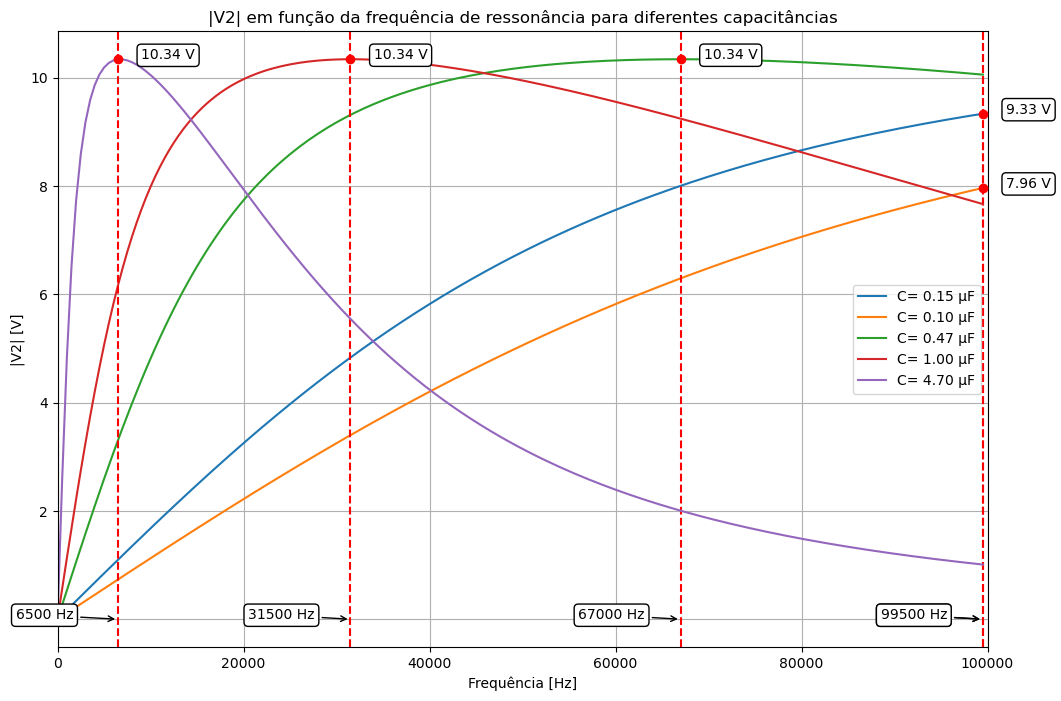

In [391]:
plt.figure(figsize=(12,8))

listaC = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]
listaV2total = []
listaFreqMax = []


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    maxV2 = 0
    freqMax = 0

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        i1, i2, ic , V2 = CalcularTransformador(kFixo, f)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            freqMax = f

    listaV2total.append(listaV2)
    listaFreqMax.append(freqMax)
    
    plt.axvline(x=freqMax, ymin=0, ymax=1, c='r', ls='--')
    plt.annotate(f'{freqMax:.0f} Hz', (freqMax, 0), xytext=(freqMax-11000, 0), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1), arrowprops=dict(arrowstyle='->'))

    plt.scatter(freqMax, maxV2, color='red', zorder=5)
    plt.annotate(f'{round(maxV2, 2)} V', (freqMax, maxV2), xytext=(freqMax+2500, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))

    plt.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')


plt.title("|V2| em função da frequência de ressonância para diferentes capacitâncias")
plt.xlabel("Frequência [Hz]")
plt.ylabel("|V2| [V]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()

In [392]:
freq = listaFreqMax[2]
C = 0.47e-6

w = 2*math.pi*freq
L1 = L2 = 1/((w**2)*C)

print(f'A indutância ideal é de {L1*1e6:0.2f} µH')

A indutância ideal é de 12.01 µH


# Trabalhando com os valores reais

In [393]:
R1 = 0.124
R2 = 0.097

L1 = 14.13e-6
L2 = 10.69e-6

C1 = C2 = 0.47e-6

f = 67000

Ufonte = 12*2/pi


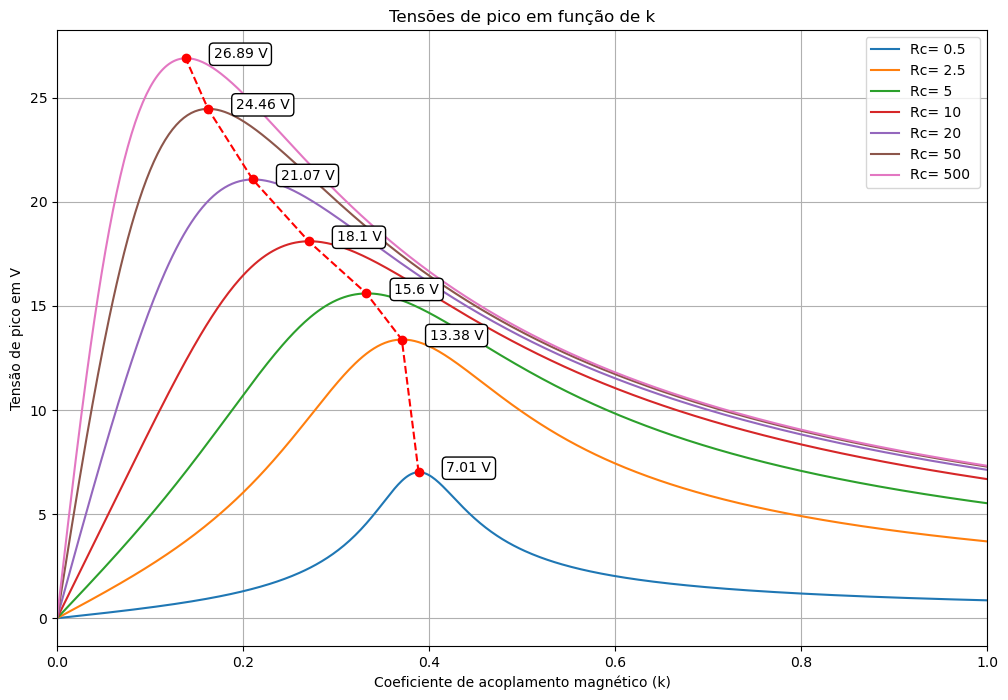

In [394]:
plt.figure(figsize=(12,8))

listaR = [0.5,2.5,5,10,20,50,500]
listaV2total = []
listaKMax = []
listaMaxV2 = []


for R in listaR:
    Rc = R
    listaV2 = []
    maxV2 = 0
    kMax = 0

    for k in PossiveisK:
        w = 2*math.pi*f
        i1, i2, ic , V2 = CalcularTransformador(k, f)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            kMax = k

    listaV2total.append(listaV2)
    listaKMax.append(kMax)
    listaMaxV2.append(maxV2)
    
    # plt.axvline(x=kMax, ymin=0, ymax=1, c='r', ls='--')
    # plt.annotate(f'{kMax:.0f} Hz', (kMax, 0), xytext=(kMax-11000, 0), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1), arrowprops=dict(arrowstyle='->'))

    plt.scatter(kMax, maxV2, color='red', zorder=5)
    plt.annotate(f'{round(maxV2, 2)} V', (kMax, maxV2), xytext=(kMax+0.03, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))

    plt.plot(PossiveisK, listaV2, label=f'Rc= {Rc} ')

plt.plot(listaKMax, listaMaxV2, color='red', linestyle='--')

plt.title("Tensões de pico em função de k")
plt.xlabel("Coeficiente de acoplamento magnético (k)")
plt.ylabel("Tensão de pico em V")
plt.xlim(0,1)
plt.grid(True)
plt.legend()
plt.savefig('img/kpossiveis.png')
plt.show()

In [395]:
L1 = L2 = L = 264e-6
C1 = C2 = C = 0.1e-6

freqRef = 1/(2*math.pi*math.sqrt(L1*C1))
print(f"Freq de referência: {freqRef:.2f} Hz")

Freq de referência: 30975.49 Hz
